# Table of Contents
 <p><div class="lev1 toc-item"><a href="#mikatype-logによる双曲性の自覚レポート" data-toc-modified-id="mikatype-logによる双曲性の自覚レポート-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>mikatype logによる双曲性の自覚レポート</a></div><div class="lev2 toc-item"><a href="#関西学院大学理工学部　情報科学科　学籍番号1234-西谷滋人" data-toc-modified-id="関西学院大学理工学部　情報科学科　学籍番号1234-西谷滋人-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>関西学院大学理工学部　情報科学科　学籍番号1234 西谷滋人</a></div><div class="lev2 toc-item"><a href="#mikatype練習時間plotの作成手順" data-toc-modified-id="mikatype練習時間plotの作成手順-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>mikatype練習時間plotの作成手順</a></div>

# mikatype logによる双曲性の自覚レポート

## 関西学院大学理工学部　情報科学科　学籍番号1234 西谷滋人


## mikatype練習時間plotの作成手順
1. このipynbをzドライブにダウンロード
1. mikatype.logをzドライブにcopy
1. jupyter notebookを起動
1. mikatype_log_report.ipynbを選択
1. 以下のpython codeを実行
   1. 読み込めないときは練習時間の後に，半角スペース2個ではなく，全角スペースが入っているかも．
   1. 読み込めないときは改行前の半角スペースが消えているかも．．
  
出てきたplotを眺め，以下の表を埋めて，自分のスキルとしての，
* タッチタイピング練習の成果，
* 双曲性

に対する考察を述べよ．もし，不幸にしてmikatypeチェック試験に不合格の学生は，
今後の練習に対する決意ならびにスマートな工夫も添えよ．


| |ホームポジション上下一段ランダム練習(秒)|ローマ字単語練習(字/分)|基本英単語練習(字/分)|
|----|----|----|----|
|初回(4/13)| | | |
|今回(6/8)| | | |

初回のデータはLUNAに提出しているはずなので，自分で確かめよ．

できたreport(mikatype_log_report.ipynb)をLUNAに提出しなさい．

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import codecs

f = codecs.open("mikatype.log", 'r', encoding='shift-jis')
#f = open("mikatype.log", 'r')
lines2 = f.readlines()
f.close()

import re
import datetime
data = [[],[]]
dt_now = datetime.datetime.now()
sum_y = 0.0
for line in lines2:
    splitted = re.split("練習時間",line)
    date_str = splitted[0]
    date_dt = datetime.datetime.strptime(date_str, '%y/%m/%d %H:%M:%S ')
    xx = (date_dt - dt_now).total_seconds()/(3600*24)
    # print(xx)
    data[0].append(xx)
    m = re.match("(.+)時間(.+)分(.+)秒",splitted[1])
    hr, minit, sec = m.groups()
    time_dur = (int(hr)*60+int(minit))*60+int(sec)
    sum_y += time_dur/3600
    data[1].append(sum_y)
    # print(sum_y)

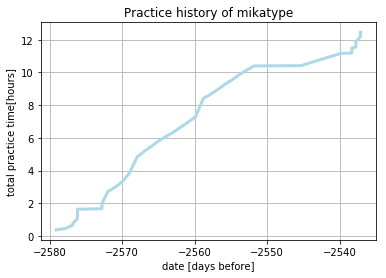

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

x_data = data[0]
y_data = data[1]
plt.plot(x_data, y_data, color='lightblue', linewidth=3)
plt.title("Practice history of mikatype")
plt.xlabel("date [days before]")
plt.ylabel("total practice time[hours]")
plt.grid(True)
plt.show()